In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

In [3]:
X.shape

(1000, 2)

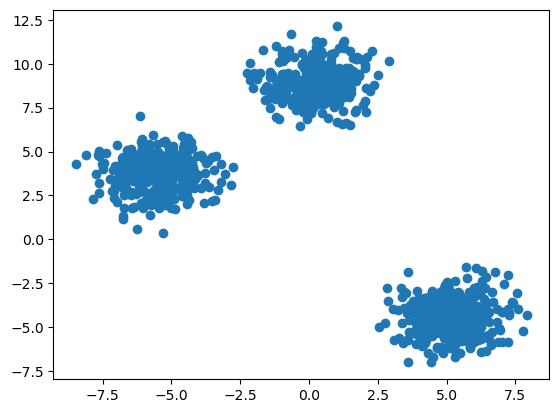

In [5]:
plt.scatter(X[:, 0], X[:, 1])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from sklearn.cluster import KMeans

In [12]:
#Manual method
#elbow method to select the k values

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

D:\ML_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ML_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ML_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ML_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the war

In [13]:
wcss


[34827.57682552021,
 7935.437286145418,
 1319.2730531585612,
 1140.4677884655125,
 992.0708509383511,
 853.7610520652662,
 756.6338638085036,
 662.7111339481835,
 577.5183353513916,
 533.8549743242045]

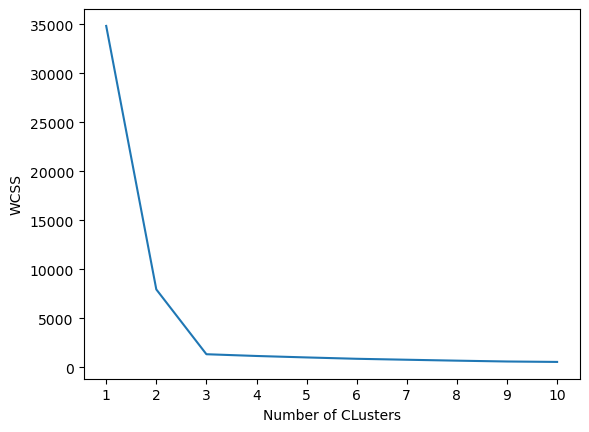

In [14]:
#plot elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of CLusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
kmeans=KMeans(n_clusters=3, init="k-means++")

In [16]:
y_labels=kmeans.fit_predict(X_train)

D:\ML_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


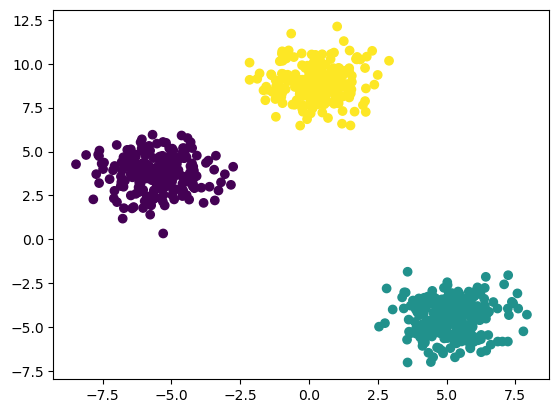

In [17]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_labels)

In [18]:
y_test_labels=kmeans.predict(X_test)

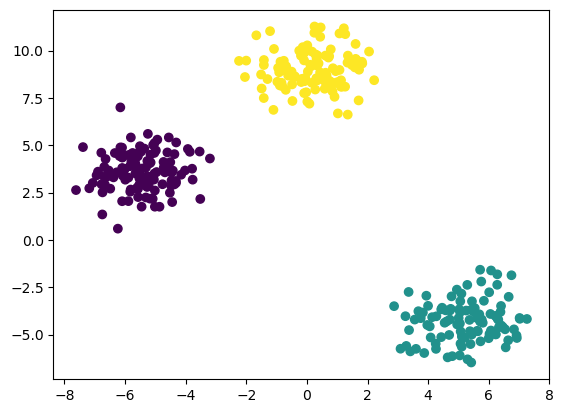

In [19]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_labels)

In [20]:
#knee locator
!pip install kneed


  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


In [21]:
from kneed import KneeLocator

In [22]:
kl=KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
kl.elbow

3

In [23]:
#performance metrics
#silhouettee score
from sklearn.metrics import silhouette_score

In [24]:
silhouette_coefficients=[]
for k in range(2, 11):
    kmeans=KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

D:\ML_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ML_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ML_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\ML_anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the war

In [25]:
score

0.3423227320952779

In [26]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.49134355005793395,
 0.3383975138989348,
 0.3457501644254669,
 0.3414015540075418,
 0.34545410145966765,
 0.3423227320952779]

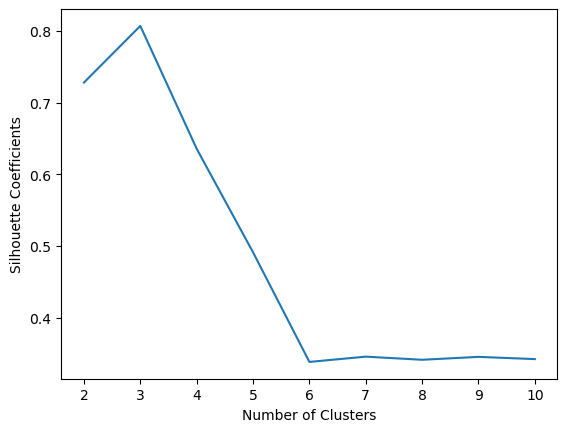

In [27]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficients")
plt.show()